<a href="https://colab.research.google.com/github/tmdcks1103/Machine-Learning-Programming/blob/main/Weather_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# -----------------------------
# 1) 데이터 준비
# -----------------------------


df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/data/weather.csv")

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,10/27/2008,Canberra,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,10/28/2008,Canberra,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,10/29/2008,Canberra,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,10/30/2008,Canberra,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [2]:
# 레이블 불균형 확인

df['RainTomorrow'].value_counts()

,count
RainTomorrow,
No,300
Yes,66


Text(0.5, 1.0, 'RainTomorrow Count')

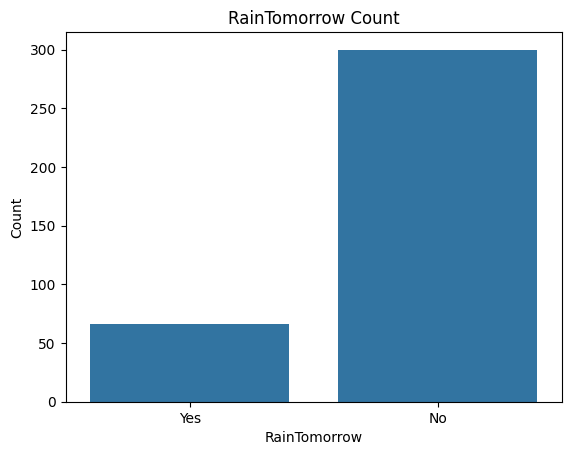

In [3]:
# 레이블 갯수 확인 (그래프)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="RainTomorrow")
plt.xlabel("RainTomorrow")        # 그래프 x 축 이름
plt.ylabel("Count")        # 그래프 y 축 이름
plt.title("RainTomorrow Count")

In [4]:
# 결측지 확인

df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,3
WindGustDir,3
WindGustSpeed,2
WindDir9am,31


In [5]:
# 모든 레이블을 숫자로 변형

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,62,0,98,120,0,15,45,7,8,12,...,15,94,84,7,7,105,136,0,16,1
1,73,0,148,139,16,20,77,1,12,0,...,22,38,28,5,3,133,152,1,16,1
2,84,0,145,115,16,27,24,7,33,3,...,55,21,23,8,7,113,106,1,46,1
3,86,0,143,48,46,34,71,7,20,14,...,42,7,22,2,7,98,53,1,13,1
4,87,0,94,52,13,26,86,10,18,10,...,35,85,115,7,7,78,64,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,50,0,108,164,0,36,101,6,29,10,...,2,65,47,1,3,158,177,0,0,0
362,51,0,89,150,0,51,106,3,17,6,...,8,97,100,0,1,130,169,0,0,0
363,52,0,135,87,0,40,38,2,14,1,...,33,133,151,3,2,106,88,0,0,0
364,54,0,135,139,0,23,52,7,16,11,...,25,105,93,6,7,117,153,0,0,0


In [8]:
# 입력과 출력 분리

X = df.drop(columns=["RainTomorrow"])
y = df["RainTomorrow"]

X

,RainTomorrow
0,1
1,1
2,1
3,1
4,0
...,...
361,0
362,0
363,0
364,0


In [9]:
y

,RainTomorrow
0,1
1,1
2,1
3,1
4,0
...,...
361,0
362,0
363,0
364,0


In [11]:

# 훈련과 테스트 데이터 분리


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
100,151,0,120,95,0,18,69,10,10,8,...,26,37,14,21,6,6,101,92,0,0
94,145,0,171,159,0,27,72,0,17,9,...,28,24,70,63,6,7,166,174,0,9
49,104,0,136,113,15,6,17,6,8,3,...,58,60,64,76,8,7,112,108,1,25
316,339,0,25,102,0,23,79,7,17,5,...,5,13,55,48,7,5,85,119,0,0
286,309,0,49,22,0,12,78,14,15,14,...,19,27,135,149,1,1,37,21,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,224,0,47,64,0,6,72,13,14,11,...,42,24,97,103,1,2,57,69,0,0
164,187,0,89,86,10,14,57,13,12,10,...,57,42,86,73,5,2,75,96,1,22
208,232,0,72,70,22,4,65,6,4,16,...,54,41,147,148,1,1,59,83,1,0
305,336,0,64,43,28,11,88,7,16,7,...,21,20,125,142,1,1,58,54,1,0


In [12]:
# 모델 구성 및 학습

dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
lr = LogisticRegression(max_iter=500)

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
lr_y_pred = lr.predict(X_test)

# 정확도 평가

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dt_acc = accuracy_score(y_test, dt_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred )
lr_acc = accuracy_score(y_test, lr_y_pred)


print("=== DT Test Accuracy ===")
print(f"Decision Tree : {dt_acc:.4f}")
print (confusion_matrix(y_test,dt_y_pred))

print("=== RF Test Accuracy ===")
print(f"Random Forest : {rf_acc:.4f}")
print (confusion_matrix(y_test,rf_y_pred))

print("=== LR Test Accuracy ===")
print(f"Logistic Reg. : {lr_acc:.4f}")
print (confusion_matrix(y_test,lr_y_pred))

=== DT Test Accuracy ===
Decision Tree : 1.0000
[[61  0]
 [ 0 13]]
=== RF Test Accuracy ===
Random Forest : 1.0000
[[61  0]
 [ 0 13]]
=== LR Test Accuracy ===
Logistic Reg. : 1.0000
[[61  0]
 [ 0 13]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
